In [1]:
from sweep_utils import * 

In [2]:
param_configs = "../param_configs/attn_fista_rho_mu_sweep_20it.json"
script_name = "../scripts/run_fineweb1B_adam_fista_momentum.sh"
df, missing = load_sweep_jsons(param_configs, script_name)

In [3]:
df[:5]

,path,final_train_loss,min_val_loss,fin_val_loss,kq_max,kq_median,kq_mean,attn_max_iter,attn_momentum,lr,momentum,mu_frac,rho_over_lr,warm_start
0,/mnt/home/tparshakova/Documents/GPT-opt/output...,7.688308,7.687516,7.687516,3227648.000,2555904.00,2.485219e+06,20,none,0.001,False,0.005,50,False
1,/mnt/home/tparshakova/Documents/GPT-opt/output...,4.081794,4.070539,4.070539,804.000,640.00,5.990547e+02,20,none,0.001,False,0.75,10,False
2,/mnt/home/tparshakova/Documents/GPT-opt/output...,4.510307,4.502413,4.502413,20.375,16.25,1.567876e+01,20,none,0.001,False,0.05,0.01,False
3,/mnt/home/tparshakova/Documents/GPT-opt/output...,4.063447,4.053514,4.053514,548.000,382.00,3.912252e+02,20,none,0.001,False,0.05,0.5,False
4,/mnt/home/tparshakova/Documents/GPT-opt/output...,6.050607,6.034818,6.034818,28672.000,21248.00,1.961598e+04,20,none,0.001,False,0.01,1,False


In [4]:
sorted(df["mu_frac"].unique()), sorted(df["rho_over_lr"].unique())

(['0.001', '0.005', '0.01', '0.05', '0.1', '0.5', '0.75'],
 ['0.01', '0.1', '0.5', '1', '10', '100', '5', '50'])

/mnt/home/tparshakova/Documents/GPT-opt/sweeps/sweep_utils.py:369: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_data = pivot.applymap(lambda v: "" if pd.isna(v) else fmt.format(float(v)))
/mnt/home/tparshakova/Documents/GPT-opt/sweeps/sweep_utils.py:371: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  s = pivot.stack(dropna=True)


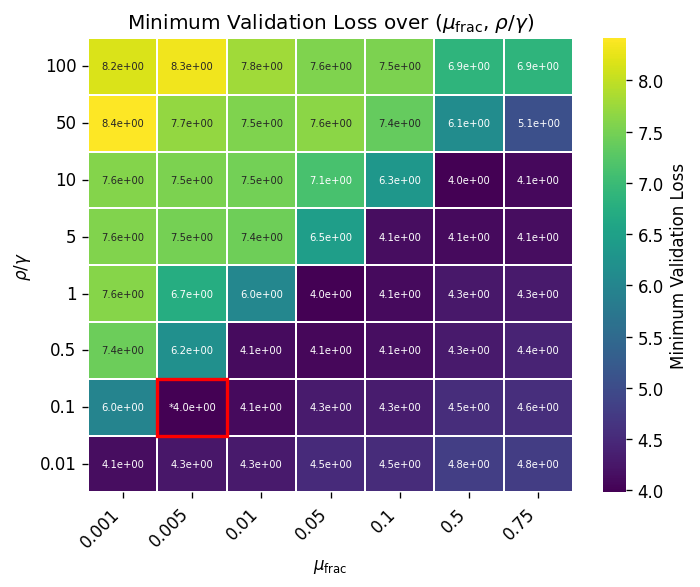

In [5]:
plot_heatmat_grid(df, value="min_val_loss")

/mnt/home/tparshakova/Documents/GPT-opt/sweeps/sweep_utils.py:369: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_data = pivot.applymap(lambda v: "" if pd.isna(v) else fmt.format(float(v)))
/mnt/home/tparshakova/Documents/GPT-opt/sweeps/sweep_utils.py:371: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  s = pivot.stack(dropna=True)


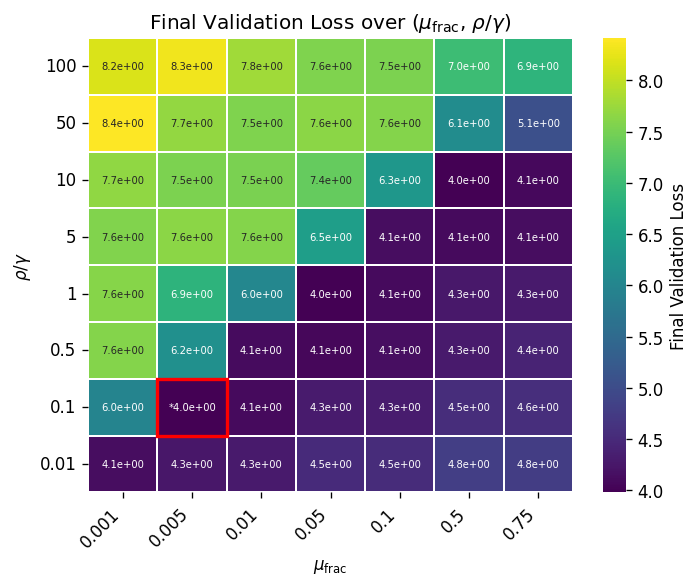

In [6]:
plot_heatmat_grid(df, value="fin_val_loss")

In [7]:
cols = ["min_val_loss", "kq_max", "mu_frac", "rho_over_lr"]
top10 = df.dropna(subset=cols).nsmallest(10, "min_val_loss")[cols].reset_index(drop=True)
print(top10)

   min_val_loss  kq_max mu_frac rho_over_lr
0      3.978792  1536.0   0.005         0.1
1      3.986940  1008.0     0.5          10
2      3.988035  1136.0    0.05           1
3      4.053514   548.0    0.05         0.5
4      4.070539   804.0    0.75          10
5      4.088216   328.0     0.1           1
6      4.089263   496.0     0.5           5
7      4.090517   552.0    0.01         0.1
8      4.105872  4960.0    0.01         0.5
9      4.121600   426.0   0.001        0.01


/mnt/home/tparshakova/Documents/GPT-opt/sweeps/sweep_utils.py:369: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_data = pivot.applymap(lambda v: "" if pd.isna(v) else fmt.format(float(v)))
/mnt/home/tparshakova/Documents/GPT-opt/sweeps/sweep_utils.py:371: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  s = pivot.stack(dropna=True)


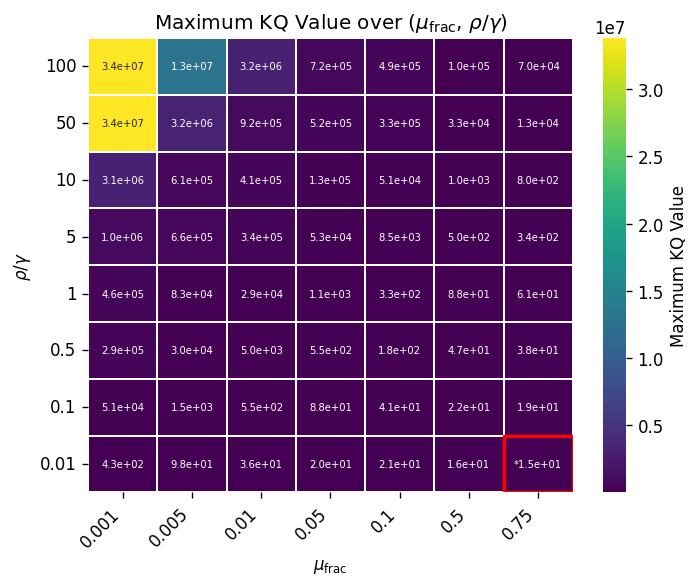

In [8]:
plot_heatmat_grid(df, value="kq_max")

/mnt/home/tparshakova/Documents/GPT-opt/sweeps/sweep_utils.py:369: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_data = pivot.applymap(lambda v: "" if pd.isna(v) else fmt.format(float(v)))
/mnt/home/tparshakova/Documents/GPT-opt/sweeps/sweep_utils.py:371: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  s = pivot.stack(dropna=True)


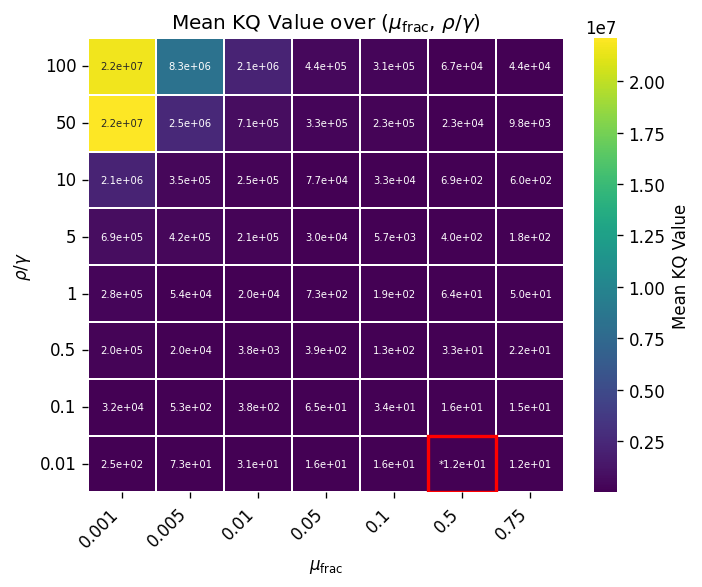

In [9]:
plot_heatmat_grid(df, value="kq_mean")